In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime


# **About Dataset**
Amazon is an American Tech Multi-National Company whose oone of the business interests include E-commerce, where they buy and store the inventory, and take care of everything from shipping and pricing to customer service and returns.
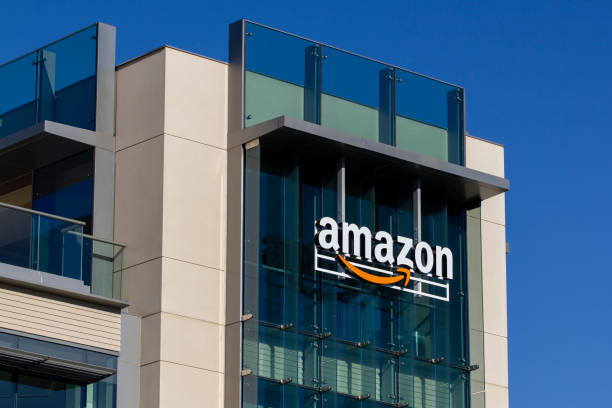
<br>**Features**
<br>product_id - Product ID
<br>product_name - Name of the Product
<br>category - Category of the Product
<br>discounted_price - Discounted Price of the Product
<br>actual_price - Actual Price of the Product
<br>discount_percentage - Percentage of Discount for the Product
<br>rating - Rating of the Product
<br>rating_count - Number of people who voted for the Amazon rating
<br>about_product - Description about the Product
<br>user_id - ID of the user who wrote review for the Product
<br>user_name - Name of the user who wrote review for the Product
<br>review_id - ID of the user review
<br>review_title - Short review
<br>review_content - Long review
<br>img_link - Image Link of the Product
<br>product_link - Official Website Link of the Product

***In this project, we focus on answering the following questions***

1.   **Basic Descriptive Statistics:**
What is the distribution of product prices and ratings across different categories?

2. **Trend Analysis:**
How do product ratings and prices vary by discount percentage?

3. **Sentiment Extraction:**
What are the common phrases or words found in the reviews of the top-rated and lowest-rated products?

4. **Association Rules Mining:**
What are the most common products bought together within certain categories?

5. **Customer Segmentation:**
Can customers be segmented based on their review patterns and purchase behaviors?

6. **Predictive Modeling:**
Can the rating a product will receive be predicted based on its price, category, discount, and textual review sentiment?











In [5]:
#Load the dataset
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


**Data Preparation**

This dataset is from [Kaggle](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data). Having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon.

In [6]:
#Check for Null value
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
#Dropping Null Values
df = df.dropna()

In [8]:
df.drop(['user_name','review_id','img_link','product_link'], axis=1, inplace=True)
df.head()

<ipython-input-8-6d0feb165ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['user_name','review_id','img_link','product_link'], axis=1, inplace=True)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  review_title         1463 non-null   object
 11  review_content       1463 non-null   object
dtypes: object(12)
memory usage: 148.6+ KB


In [10]:
#Data types are objects, we need to convert them into correct datatypes
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('₹', '').replace(',', '').strip())
    return(x)

def clean_rating(x):
    try:
        return float(x.strip())
    except:
        return np.nan

In [11]:
# Data Cleaning
df['actual_price']= df['actual_price'].apply(clean_currency).astype(float)
df['discounted_price']= df['discounted_price'].apply(clean_currency).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype(int)
df['rating']  = df['rating'].apply(clean_rating).astype(float)
df['rating_count'] = df['rating_count'].apply(clean_currency).astype(float)

In [12]:
#Basic Descriptive Statistics
#Extract Categories
df['category'] = df['category'].apply(lambda x: x.split('|')[0] if '|' in x else x)

In [13]:
#Distribution of product prices and ratings across different categories
price_stat = df.groupby('category')['discounted_price'].describe()
rating_stat = df.groupby('category')['rating'].describe()

In [14]:
# Descriptive Analysis
(price_stat, rating_stat)

(                       count         mean           std     min     25%  \
 category                                                                  
 Car&Motorbike            1.0  2339.000000           NaN  2339.0  2339.0   
 Computers&Accessories  451.0   845.393836   2388.047248    39.0   204.0   
 Electronics            526.0  5965.887833  10279.670967    79.0   399.0   
 Health&PersonalCare      1.0   899.000000           NaN   899.0   899.0   
 Home&Kitchen           448.0  2330.615647   3467.403842    79.0   632.5   
 HomeImprovement          2.0   337.000000    124.450793   249.0   293.0   
 MusicalInstruments       2.0   638.000000    226.274170   478.0   558.0   
 OfficeProducts          31.0   301.580645    317.288699    50.0   117.0   
 Toys&Games               1.0   150.000000           NaN   150.0   150.0   
 
                           50%      75%      max  
 category                                         
 Car&Motorbike          2339.0  2339.00   2339.0  
 Computer

The analysis indicates that product prices vary widely by category, with "Electronics" showing the highest variability and prices. Most categories exhibit high average ratings above 4.0, reflecting overall customer satisfaction. However, categories with fewer entries provide limited insights due to the small sample size.

In [15]:
# Trend Analysis
# Group data by discount percentage and calculate mean price and rating
grouped_data = df.groupby('discount_percentage').agg({
    'actual_price': 'mean',
    'discounted_price': 'mean',
    'rating': 'mean'
}).reset_index()

grouped_data

,discount_percentage,actual_price,discounted_price,rating
0,0,2787.571429,2787.551020,4.240816
1,2,160.000000,157.000000,4.500000
2,3,678.000000,659.000000,4.200000
3,4,6475.000000,6216.250000,4.200000
4,5,517.250000,491.250000,4.300000
...,...,...,...,...
87,88,1599.333333,191.833333,3.850000
88,89,800.000000,89.000000,3.900000
89,90,1349.000000,136.500000,3.987500
90,91,19999.000000,1799.000000,4.200000


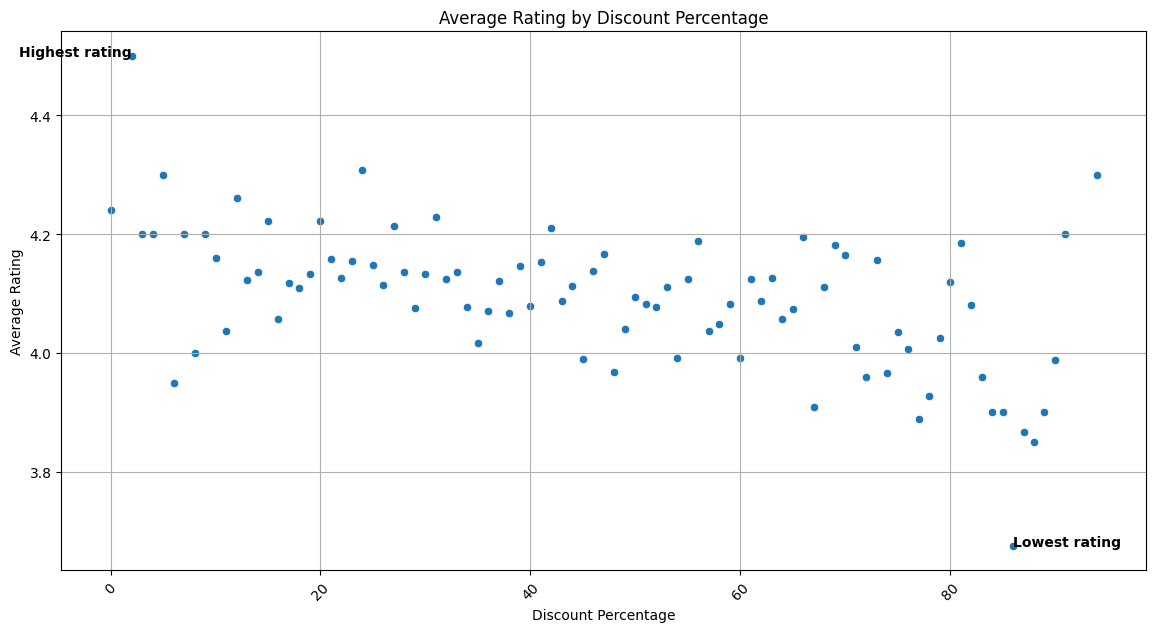

In [16]:
# Trend Analysis
# Visualize the average rating by discount percentage
plt.figure(figsize=(14, 7))
sns.scatterplot(x='discount_percentage', y='rating', data=grouped_data)
plt.xlabel('Discount Percentage')
plt.ylabel('Average Rating')
plt.title('Average Rating by Discount Percentage')
plt.xticks(rotation=45)
plt.grid(True)

# Annotation
min_rating = grouped_data[grouped_data['rating'] == grouped_data['rating'].min()]
max_rating = grouped_data[grouped_data['rating'] == grouped_data['rating'].max()]
for line in range(min_rating.shape[0]):
    plt.text(min_rating.discount_percentage.iloc[line], min_rating.rating.iloc[line], 'Lowest rating', horizontalalignment='left', size='medium', color='black', weight='semibold')
for line in range(max_rating.shape[0]):
    plt.text(max_rating.discount_percentage.iloc[line], max_rating.rating.iloc[line], 'Highest rating', horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.show()

The scatter plot "Average Rating by Discount Percentage" shows a slight decline in average ratings as discounts increase, suggesting that higher discounts may correlate with slightly lower customer satisfaction, possibly due to perceptions of quality or value.

In [17]:
# Sentiment Extraction
# Common words found in the reviews of top-rated and lowest-rated products
from collections import Counter
import re

top_rated_reviews = df[df['rating'] >= 4]['review_title']
lowest_rated_reviews = df[df['rating'] <= 3]['review_title']

def get_most_common_words(reviews, num_words=10):
    words = re.findall(r'\w+', reviews.str.cat(sep=' ').lower())
    # Count words and return the most common
    return Counter(words).most_common(num_words)

# Get the top 10 most common words
top_common_words_top_rated = get_most_common_words(top_rated_reviews, 10)
top_common_words_lowest_rated = get_most_common_words(lowest_rated_reviews, 10)

print("Top 10 Common Words in Top-Rated Product Reviews:")
print(top_common_words_top_rated)
print("\nTop 10 Common Words in Lowest-Rated Product Reviews:")
print(top_common_words_lowest_rated)

Top 10 Common Words in Top-Rated Product Reviews:
[('good', 3040), ('product', 1830), ('for', 1109), ('it', 717), ('nice', 700), ('the', 673), ('is', 671), ('and', 656), ('quality', 594), ('to', 510)]

Top 10 Common Words in Lowest-Rated Product Reviews:
[('not', 17), ('good', 14), ('product', 13), ('is', 9), ('very', 6), ('to', 6), ('working', 5), ('it', 5), ('buy', 4), ('t', 4)]


The common words in top-rated product reviews such as "good," "nice," and "quality" reflect positive sentiments, while in lowest-rated reviews, words like "not" and "working" suggest dissatisfaction, highlighting distinct sentiment trends between the two rating groups.

In [18]:
# Association Rules Mining
# Most common products bought together within certain categories
from itertools import combinations
from collections import Counter
results = {}

for category, group in df.groupby('category'):
    # Create a list of all products in the same order
    order_products = group.groupby('product_id')['product_name'].apply(list)

    # Find all combinations of product pairs in each order and count them
    product_pairs = Counter()
    for products in order_products:
        for combo in combinations(products, 2):
            product_pairs[combo] += 1

    # Store the most common product pairs for each category
    results[category] = product_pairs.most_common(4)

# Print results
for category, common_pairs in results.items():
    print(f"Category: {category}")
    for pair, count in common_pairs:
        print(f"Pair: {pair}, Count: {count}")
    print("\n")

Category: Car&Motorbike


Category: Computers&Accessories
Pair: ('Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black', 'Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black'), Count: 3
Pair: ('boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)', 'boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)'), Count: 3
Pair: ('Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)', 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'), Count: 3
Pair: ('Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)', 'Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging M

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


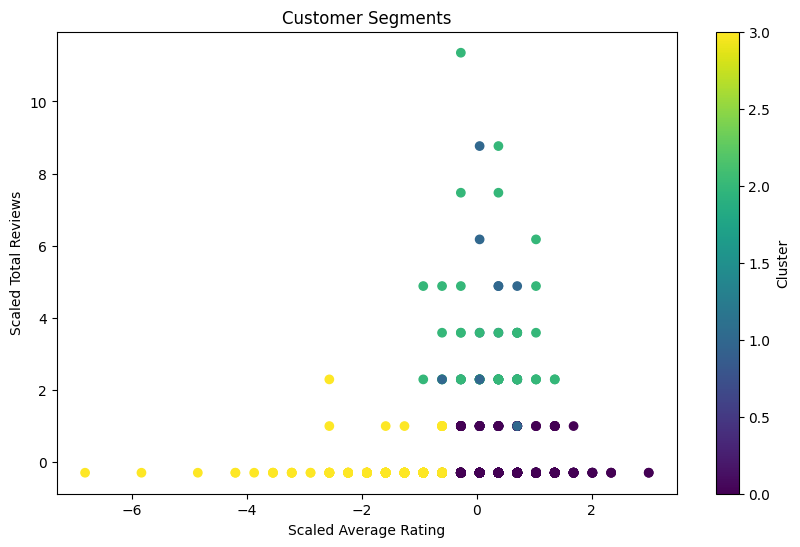

In [19]:
# Customer Segmentation
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

customer_features = df.groupby('user_id').agg({
    'rating': ['mean', 'count'],
    'actual_price': ['mean', 'sum']
}).reset_index()
customer_features.dropna(inplace = True)
customer_features.columns = ['_'.join(col).strip() for col in customer_features.columns.values]
customer_features.rename(columns={
    'user_id_': 'user_id',
    'rating_mean': 'avg_rating',
    'rating_count': 'total_reviews',
    'actual_price_mean': 'avg_purchase_amount',
    'actual_price_sum': 'total_spent'
}, inplace=True)

# Scale the features
scaler = StandardScaler()
feature_matrix = customer_features[['avg_rating', 'total_reviews', 'avg_purchase_amount', 'total_spent']]
scaled_features = scaler.fit_transform(feature_matrix)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # Choosing 4 clusters for illustration
customer_features['cluster'] = kmeans.fit_predict(scaled_features)

# Plotting the clusters (for the first two features as an example)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=customer_features['cluster'], cmap='viridis', marker='o')
plt.title('Customer Segments')
plt.xlabel('Scaled Average Rating')
plt.ylabel('Scaled Total Reviews')
plt.colorbar(label='Cluster')
plt.show()

Cluster 0 has high scaled avg rating and low scaled total reviews
<br> Cluster 1 has high scaled avg rating and moderate scaled total reviews
<br> Cluster 2 has high scaled avg rating and high scaled total reviews
<br> Cluster 3 has low scaled avg rating and low scaled total reviews

Cluster analysis shows Cluster 0 and 3 to be more segmented, Cluster 1 and 2 have some clusters mixed together.

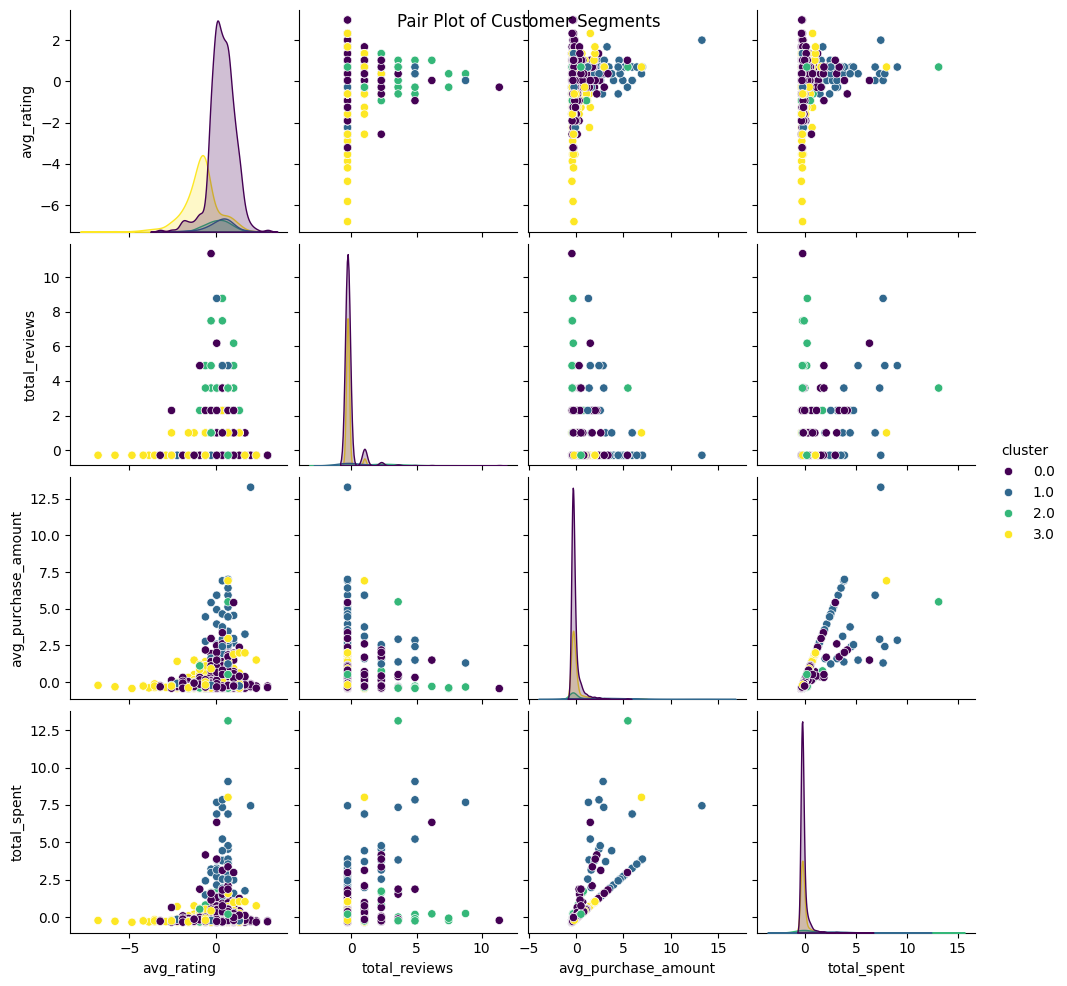

In [20]:
# Cluster Analysis Continued
import seaborn as sns

# Add 'cluster' to the scaled features dataframe for coloring
features_df = pd.DataFrame(scaled_features, columns=['avg_rating', 'total_reviews', 'avg_purchase_amount', 'total_spent'])
features_df['cluster'] = customer_features['cluster']

sns.pairplot(features_df, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot of Customer Segments', verticalalignment='top')
plt.show()

In [30]:
# Predictive Analysis
# Can the rating a product will receive be predicted based on its price, category, discount, and textual review sentiment?
# Target Column 'rating', we will use machine learning sklearn models
# Packages for sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [54]:
# Drop rows with NaN values in 'rating' column
amazon_data = df.dropna(subset=['rating'])
amazon_data = pd.get_dummies(amazon_data, columns=['category'])

# Prepare the feature matrix X and target variable y
X = amazon_data.drop(columns=['product_id', 'product_name', 'about_product', 'user_id',
                        'review_title', 'review_content','rating'])
y = amazon_data['rating']

X_numeric = X.drop(columns=X)

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=seed)
print(X_train,y_train,X_test,y_test)

[[3499. 5795.   40. ...    0.    0.    0.]
 [ 399.  995.   60. ...    0.    0.    0.]
 [1399. 2490.   44. ...    0.    0.    0.]
 ...
 [2499. 5999.   58. ...    0.    0.    0.]
 [2219. 3080.   28. ...    0.    0.    0.]
 [ 600.  600.    0. ...    0.    0.    0.]] 1068    3.9
640     3.9
801     4.3
382     4.4
304     4.3
       ... 
1132    4.1
1297    4.2
862     4.1
1462    3.6
1128    4.1
Name: rating, Length: 1169, dtype: float64 [[1199. 2199.   45. ...    0.    0.    0.]
 [1099. 1899.   42. ...    0.    0.    0.]
 [ 599. 1800.   67. ...    0.    0.    0.]
 ...
 [ 129.  999.   87. ...    0.    0.    0.]
 [ 279.  375.   26. ...    0.    0.    0.]
 [  96.  399.   76. ...    0.    0.    0.]] 894     4.4
1108    4.3
415     3.5
524     4.1
1038    4.0
       ... 
1365    3.4
804     4.2
653     4.2
724     4.3
254     3.6
Name: rating, Length: 293, dtype: float64


In [63]:
# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a function to train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'ElasticNet': ElasticNet(),
        'Decision Tree': DecisionTreeRegressor(),
        'K-Neighbors': KNeighborsRegressor(),
        'SVR': SVR(),
        'Random Forest': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'Extra Trees': ExtraTreesRegressor(),
        'AdaBoost': AdaBoostRegressor()
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        results[name] = mse

    return results

# Evaluate the models
model_results = evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

model_results

{'Linear Regression': 1.7203128298540922e+24,
 'Lasso': 0.08286350535689767,
 'Ridge': 0.07106222219016872,
 'ElasticNet': 0.08286350535689767,
 'Decision Tree': 0.12402730375426622,
 'K-Neighbors': 0.07390716723549491,
 'SVR': 0.07352301231778971,
 'Random Forest': 0.06275183617747448,
 'Gradient Boosting': 0.06688847738141693,
 'Extra Trees': 0.06919992150170652,
 'AdaBoost': 0.07643400630915093}

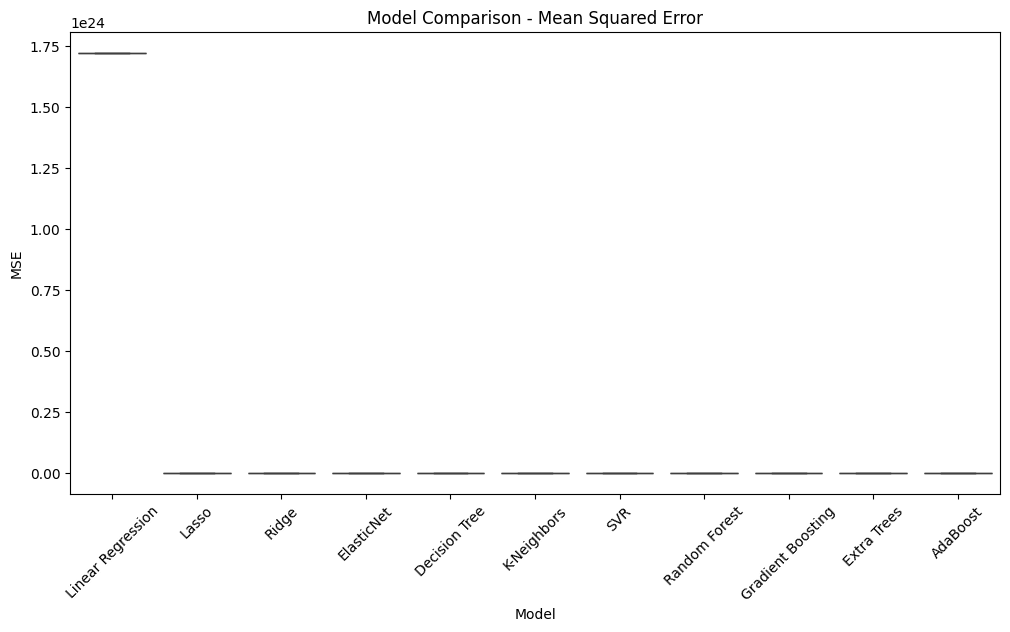

In [59]:
# Convert results to DataFrame
results_df = pd.DataFrame(list(model_results.items()), columns=["Model", "MSE"])

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="MSE", data=results_df)
plt.xticks(rotation=45)
plt.title("Model Comparison - Mean Squared Error")
plt.show()

The results indicate that the Random Forest Regressor performs best among the models tested for predicting Amazon product ratings, as it has the lowest Mean Squared Error (MSE) of 0.06275183617747448. This suggests that the Random Forest model can most accurately capture the complex relationships and patterns within the data compared to the other models evaluated.

In the context of Amazon ratings, these models attempt to understand how various factors such as discounted price, actual price, discount percentage, and rating count influence customer ratings. The low MSE values for models like Ridge Regression, SVR, and Gradient Boosting indicate that these models also perform well, but not as well as the Random Forest Regressor.

The exceptionally high MSE for Linear Regression suggests it is not suitable for this task, possibly due to its inability to capture non-linear relationships in the data. Models like Lasso and ElasticNet, which are regularized versions of linear regression, perform better but still not as well as the tree-based methods.

Overall, these models provide insights into how different features correlate with Amazon product ratings. For example, they can help identify which pricing strategies, discount offers, or product categories are more likely to result in higher customer ratings. This understanding can be crucial for making informed decisions in various aspects of product management and marketing strategies within the Amazon marketplace.